# ANALYSIS OF SEGMENTATION OF A BANK'S CUSTOMER TYPES FOR THE MARKETING DEPARTMENT

# ANALISIS DE SEGMENTACION DE TIPOS DE CLIENTES DE UN BANCO PARA EL DEPARTAMENTO DE MARKETING

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

## IMPORT LIBRARIES AND DATASETS

## IMPORTAR LAS LIBRERÍAS Y LOS DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
import os
path = r'C:\Users\Dael\Desktop\data'
cfile = 'Marketing_data.csv'
fullpath = os.path.join(path, cfile)

credit_card_df = pd.read_csv(fullpath)
credit_card_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Defining the meaning of each variable**

Definiendo significado de cada variable

* CUSTID: Identificación del titular de la tarjeta de crédito
* BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
* BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
* PURCHASES: Cantidad de compras realizadas desde la cuenta
* ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
* INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
* CASH_ADVANCE: Anticipo otorgado al usuario
* PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
* PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
* ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
* PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
* CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
* CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
* PURCHASES_TRX: número de transacciones de compras realizadas
* CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
* PAYMENTS: Número de pagos realizados por el usuario
* MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
* PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
* TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

In [3]:
credit_card_df.shape

(8950, 18)

In [4]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credit_card_df.describe()
# El balance medio es $1564 
# La frecuencia del balance se actualiza con mucha frecuencia, en promedio ~0.9
# El promedio de las compras es $1000
# El importe máximo de compra no recurrente es en promedio ~$600
# El promedio de la frecuencia de las compras está cerca de 0.5
# El promedio de ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, y CASH_ADVANCE_FREQUENCY es en general bajo
# El promedio del límite de crédito es ~ 4500
# El porcentaje de pago completo es 15%
# Los clientes llevan de promedio en el servicio 11 años

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**checking outliers in ONE OFF PURCHASES**

revisando valores atipicos en ONE OFF PURCHASES

In [6]:
# quien ha hecho una compra de $40761
credit_card_df[credit_card_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**cheking who is the customer with the highest CASH ADVANCE request**

revisando quien es el cliente que ha solictado un anticipo (CASH ADVANCE) mas alto

In [7]:
# revisar  quien pago por anticipado $47137!
# Este cliente hizo un total de 123 transacciones por adelantado!!
# Nunca paga sus compras completamente con la tarjeta

credit_card_df[credit_card_df['CASH_ADVANCE'] > 47137.2]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## DATASET DISPLAY

##  VISUALIZACIÓN DEL DATASET

**cheking null data**

revisando datos nulos

In [8]:
credit_card_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
# revisando solo para la columna BALANCE
np.mean(credit_card_df['BALANCE'].isnull()) 

0.0

**view percentage of missing data for each column**

ver poncentaje de datos faltantes para cada columna

In [10]:
# contando el numero de valores nulos
credit_card_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
for col in credit_card_df.columns:
    missing_data = np.mean(credit_card_df[col].isnull())
    print('{} - {} %'.format(col, missing_data*100))

CUST_ID - 0.0 %
BALANCE - 0.0 %
BALANCE_FREQUENCY - 0.0 %
PURCHASES - 0.0 %
ONEOFF_PURCHASES - 0.0 %
INSTALLMENTS_PURCHASES - 0.0 %
CASH_ADVANCE - 0.0 %
PURCHASES_FREQUENCY - 0.0 %
ONEOFF_PURCHASES_FREQUENCY - 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY - 0.0 %
CASH_ADVANCE_FREQUENCY - 0.0 %
CASH_ADVANCE_TRX - 0.0 %
PURCHASES_TRX - 0.0 %
CREDIT_LIMIT - 0.0111731843575419 %
PAYMENTS - 0.0 %
MINIMUM_PAYMENTS - 3.4972067039106145 %
PRC_FULL_PAYMENT - 0.0 %
TENURE - 0.0 %


In [12]:
# fill in missing data with the average of the field 'MINIMUM_PAYMENT'. 
# rellenar datos faltantes con el promedio del campo 'MINIMUM_PAYMENT' 
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] 

3      NaN
45     NaN
47     NaN
54     NaN
55     NaN
        ..
8919   NaN
8929   NaN
8935   NaN
8944   NaN
8946   NaN
Name: MINIMUM_PAYMENTS, Length: 313, dtype: float64

In [13]:
credit_card_df.loc[(credit_card_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credit_card_df['MINIMUM_PAYMENTS'].mean()

In [14]:
# fill in the missing data with the average of the field 'CREDIT_LIMIT'. 
# rellenar los datos faltantes con el promedio del campo 'CREDIT_LIMIT' 
credit_card_df.loc[(credit_card_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credit_card_df['CREDIT_LIMIT'].mean()

In [15]:
# checking that all missing data have been filled in
# revisando que todos los datos faltantes se hayan rellenado
for col in credit_card_df.columns:
    missing_data = np.mean(credit_card_df[col].isnull())
    print('{} - {} %'.format(col, missing_data*100))


CUST_ID - 0.0 %
BALANCE - 0.0 %
BALANCE_FREQUENCY - 0.0 %
PURCHASES - 0.0 %
ONEOFF_PURCHASES - 0.0 %
INSTALLMENTS_PURCHASES - 0.0 %
CASH_ADVANCE - 0.0 %
PURCHASES_FREQUENCY - 0.0 %
ONEOFF_PURCHASES_FREQUENCY - 0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY - 0.0 %
CASH_ADVANCE_FREQUENCY - 0.0 %
CASH_ADVANCE_TRX - 0.0 %
PURCHASES_TRX - 0.0 %
CREDIT_LIMIT - 0.0 %
PAYMENTS - 0.0 %
MINIMUM_PAYMENTS - 0.0 %
PRC_FULL_PAYMENT - 0.0 %
TENURE - 0.0 %


**checking for duplicate data**

verificando si hay datos duplicados

In [16]:
credit_card_df.duplicated().sum()

0

In [17]:
# elimianr la columna Customer ID ya que no nos sirve para nada 
credit_card_df.drop(['CUST_ID'], axis=1, inplace=True)

In [18]:
credit_card_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [19]:
n = len(credit_card_df.columns)
n

17

C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dael\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

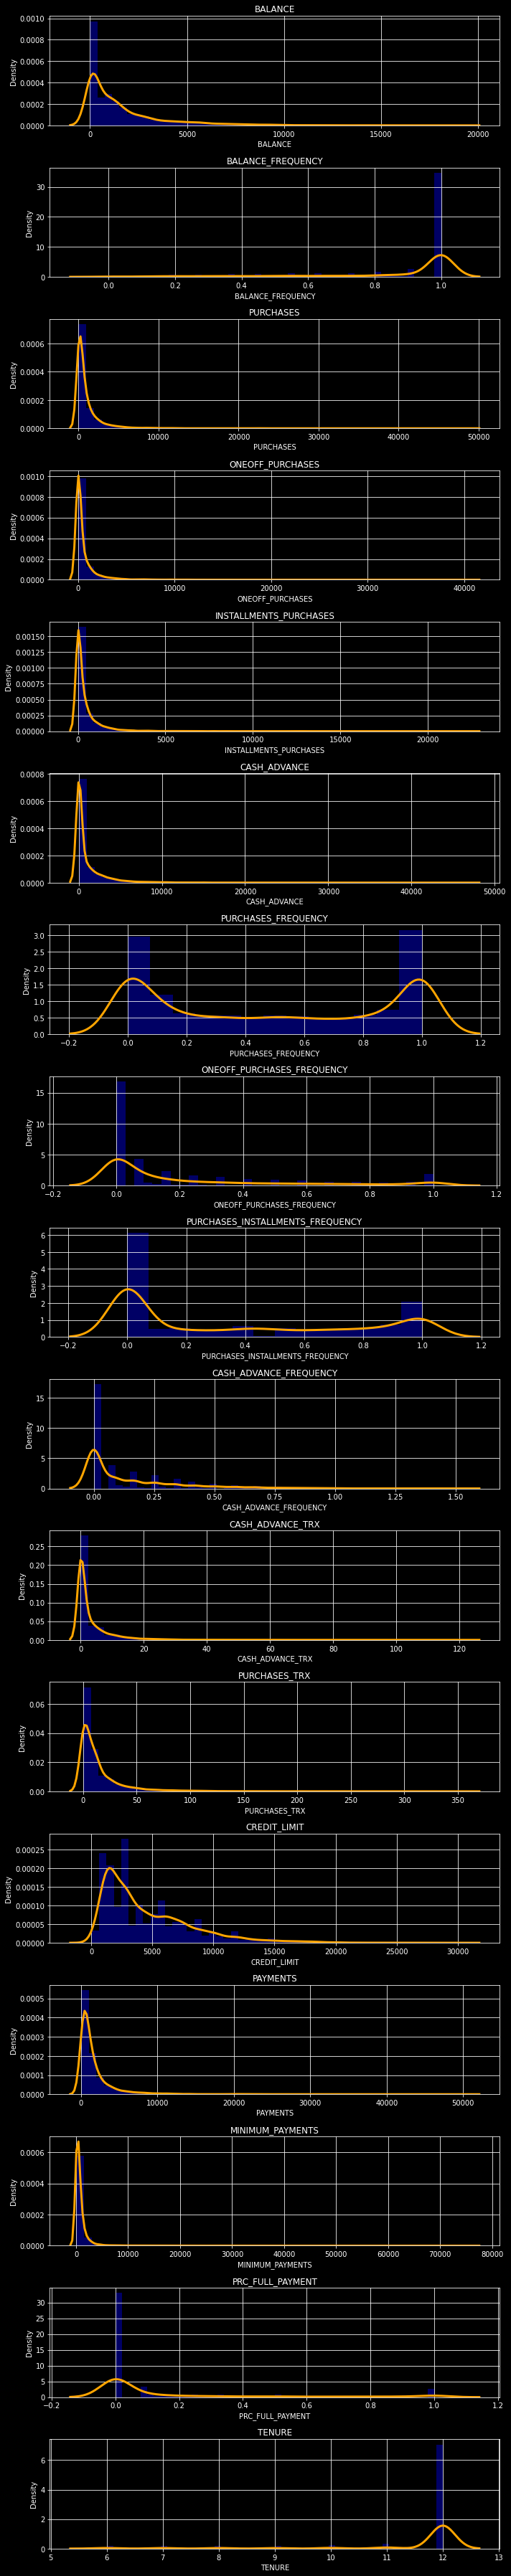

In [43]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE muestra la densidad de una probabilidad para diferentes valores de una variable continua. 


# El balance promedio es  $1500
# 'Balance_Frequency' para muchos usuarios se actualiza muy frecuentemente ~1
# Para el campo 'PURCHASES_FREQUENCY', hay dos grupos diferentes de clientes
# Para los campos 'ONEOFF_PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY' la gran mayoría de usuarios no pagan todo de golpe ni a plazos
# Muy pocos clientes pagan su deuda al completo 'PRC_FULL_PAYMENT'~0
# El promedio del límite del crédito está entorno de los $4500
# La mayoría de clientes llevan ~11 años usando el servicio

plt.figure(figsize=(10,50)) 
for i in range(n):
    plt.subplot(n, 1, i+1) #filas, columna, grafico_1 
    sns.distplot(credit_card_df[credit_card_df.columns[i]], kde_kws={'color': 'orange', 'lw': 3, 'label': 'KDE'}, hist_kws={'color': 'b'})
    plt.title(credit_card_df.columns[i])
    plt.grid()
    plt.style.use('dark_background')
    
plt.tight_layout()

**checking correlations**

revisando las correlaciones

In [21]:
correlations = credit_card_df.corr()

<AxesSubplot:>

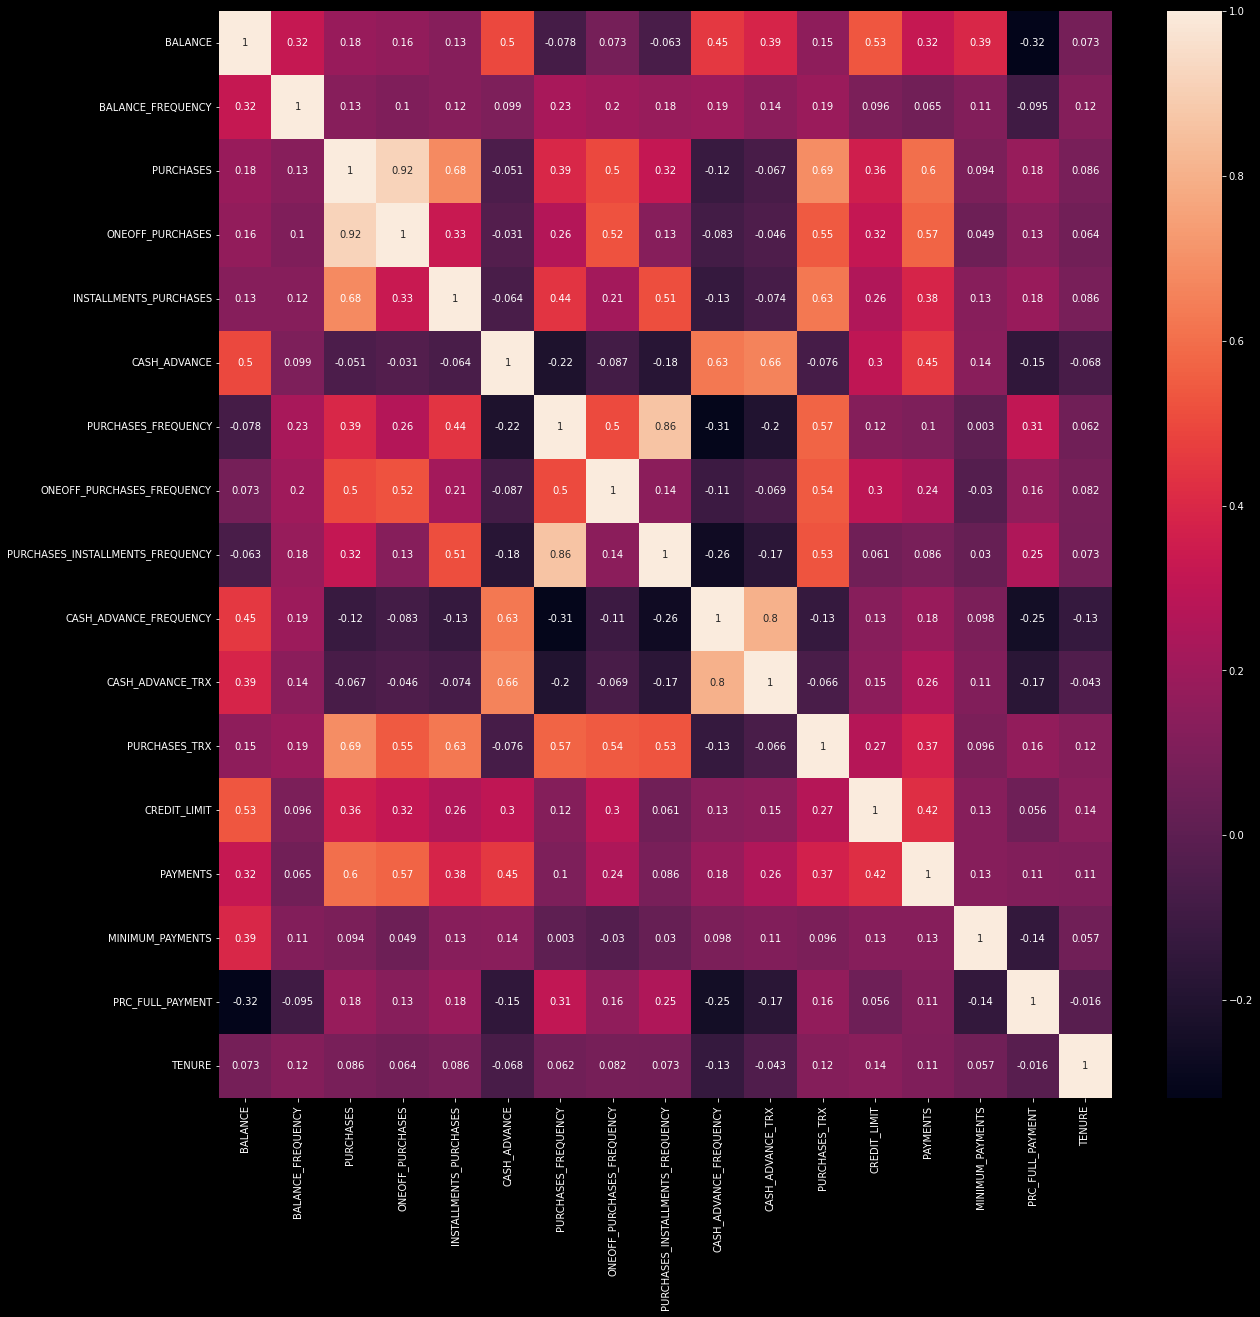

In [22]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True) 
# 'PURCHASES' tienen una alta correlación con ONE-OFF PURCHASES, 'INSTALLMENT PURCHASES, PURCHASE TRANSACTIONS, CREDIT LIMIT y PAYMENTS. 
# Correlación positiva muy elevada entre 'PURCHASES_FREQUENCY' y 'PURCHASES_INSTALLMENT_FREQUENCY'


### FINDING THE OPTIMAL NUMBER OF CLUSTERS "K"  USING THE ELBOW METHOD

### ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS "K" UTILIZANDO EL MÉTODO DEL CODO

**scale the dataset first**

escalar primero el dataset de las columnas con valores muy pequeños

In [51]:

scaler = StandardScaler() # cada columna es como una distribución normal
credit_card_df_scaled = scaler.fit_transform(credit_card_df)

In [52]:
credit_card_df_scaled.shape

(8950, 17)

In [53]:
credit_card_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

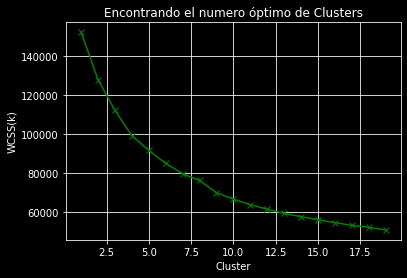

In [26]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    k_means = KMeans(n_clusters= i)
    k_means.fit(credit_card_df_scaled)
    scores_1.append(k_means.inertia_) # WCSS
    
plt.plot(range_values, scores_1, 'gx-')
plt.title('Encontrando el numero óptimo de Clusters')
plt.xlabel('Cluster')
plt.ylabel('WCSS(k)')
plt.grid()
plt.show()

# Con el gráfico se puede ver que en 4 clusters es donde se forma el codo de la curva.
# Sin embargo, los valores no se reducen a una forma lineal hasta el 8vo cluster. 
# En este caso eligiré un número de clusters igual a 8. Es decri 8 segmentos

### APPLYING THE METHOD OF K-MEANS

### APLICANDO EL MÉTODO DE K-MEANS PARA SEGMENTAR EL MERCADO

In [27]:
k_means

KMeans(n_clusters=19)

In [28]:
k_means =  KMeans(8)
k_means.fit(credit_card_df_scaled)
labels = k_means.labels_
labels  # etiquetas en cada numemro de cluster

array([1, 4, 3, ..., 7, 7, 7])

In [29]:
# 8 centroides  
k_means.cluster_centers_.shape 

(8, 17)

In [30]:
cluster_centers = pd.DataFrame(data= k_means.cluster_centers_, columns= [credit_card_df.columns])
cluster_centers

# cada fila representa un centroide

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364778,0.333613,-0.037381,-0.244339,0.360316,-0.363589,0.990669,-0.387079,1.206081,-0.475238,-0.361153,0.187666,-0.260925,-0.216886,-0.032660,0.313849,0.257637
1,0.019493,0.403153,-0.361863,-0.246971,-0.401779,-0.086621,-0.867503,-0.410513,-0.758672,0.115631,-0.020700,-0.486861,-0.305126,-0.248169,-0.008412,-0.456474,0.271801
2,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
3,-0.165253,0.392196,0.453349,0.593167,-0.017967,-0.333914,0.943302,1.878357,0.089014,-0.407665,-0.323378,0.523732,0.373578,0.086557,-0.162605,0.406347,0.261047
4,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341
5,-0.701229,-2.144116,-0.311099,-0.235720,-0.302414,-0.321905,-0.556586,-0.444989,-0.439730,-0.520844,-0.376103,-0.419790,-0.177161,-0.202048,-0.256658,0.281550,0.199199
6,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
7,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733


In [31]:
# Para entender mejor estos valores, aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns= [credit_card_df.columns])
cluster_centers

# Primer Cluster de Clientes :
# Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) 
# y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%

# Segundo Cluster de Clientes :
# que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra,
# alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)

# Tercer Cluster de Clientes :
# límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto

# Cuarto Cluster de Clientes :
# estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,805.220083,0.956301,923.338824,186.885283,736.896637,216.408238,0.887954,0.086985,0.843765,0.040044,0.784226,19.374504,3545.099307,1105.280930,788.094852,0.245510,11.862103
1,1605.047605,0.972774,230.077907,182.515426,47.744156,797.223294,0.142179,0.079994,0.062922,0.158283,3.107562,2.608297,3384.275575,1014.718178,844.603245,0.020204,11.881057
2,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
3,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
4,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
5,104.925267,0.369349,338.537483,201.190254,137.598754,303.821813,0.266966,0.069709,0.189677,0.030918,0.682203,4.275424,3849.863936,1148.234177,266.075424,0.236063,11.783898
6,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
7,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904


In [32]:
labels.shape

(8950,)

In [33]:
labels.min()

0

In [34]:
labels.max()

7

In [35]:
# concatenar las etiquetas de los clusters con el dataset original 
credit_card_df_cluster = pd.concat([credit_card_df, pd.DataFrame({'cluster': labels})], axis = 1)
credit_card_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


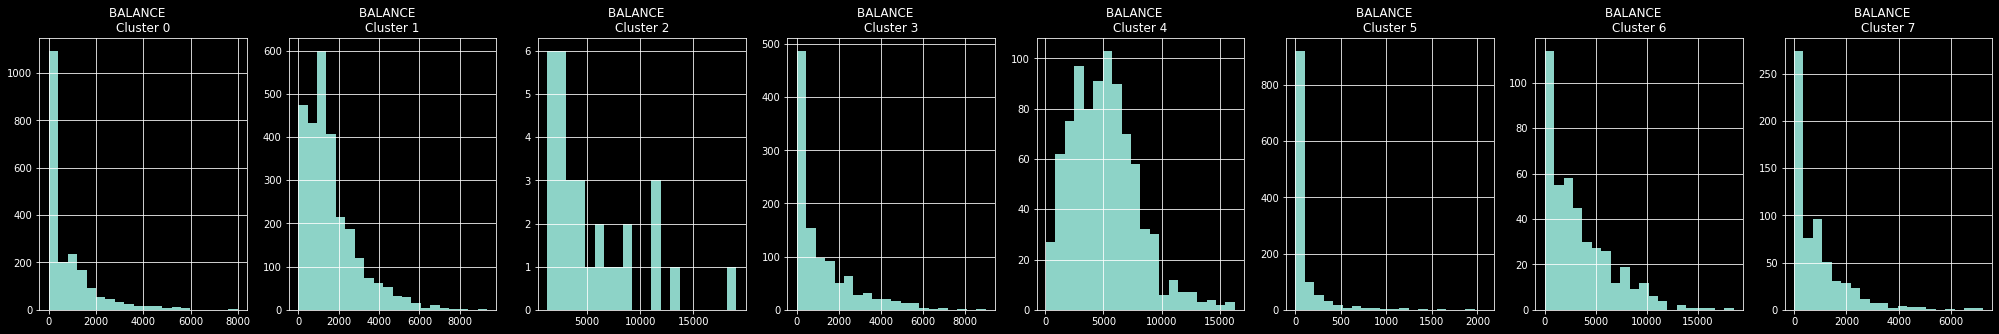

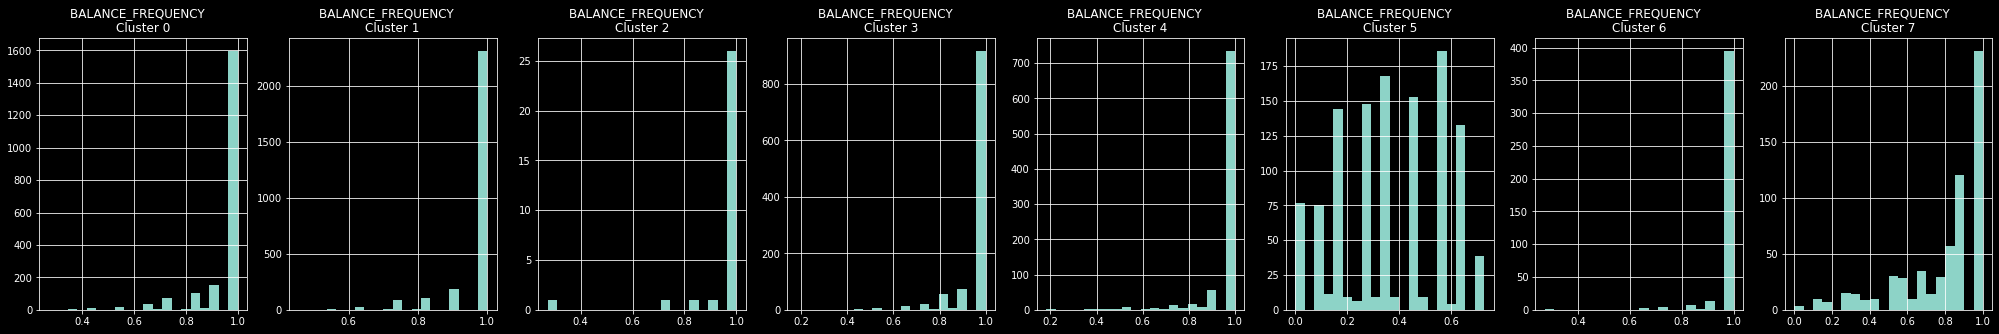

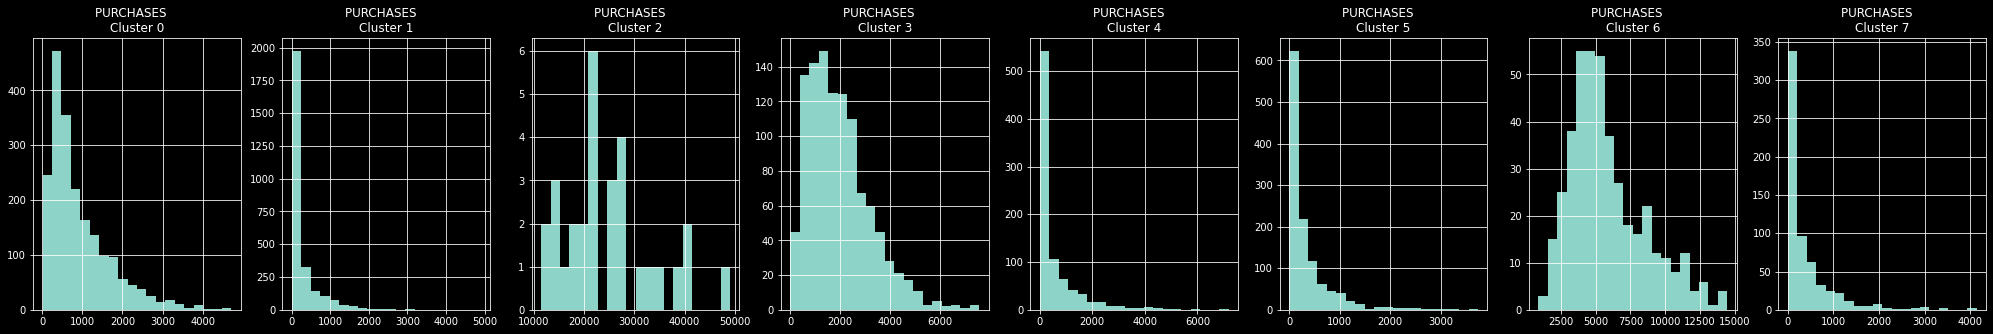

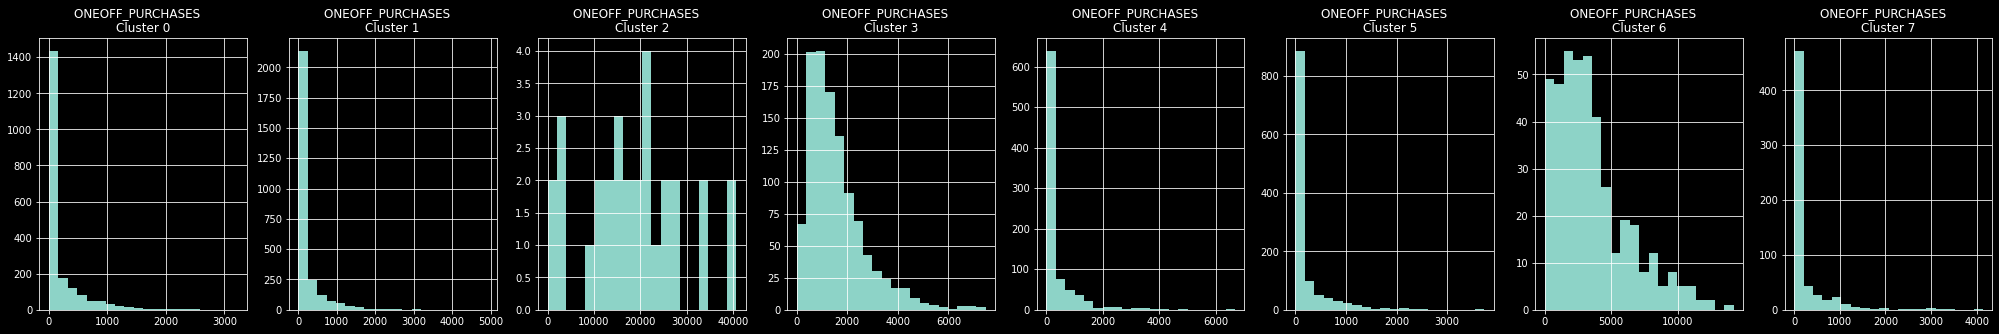

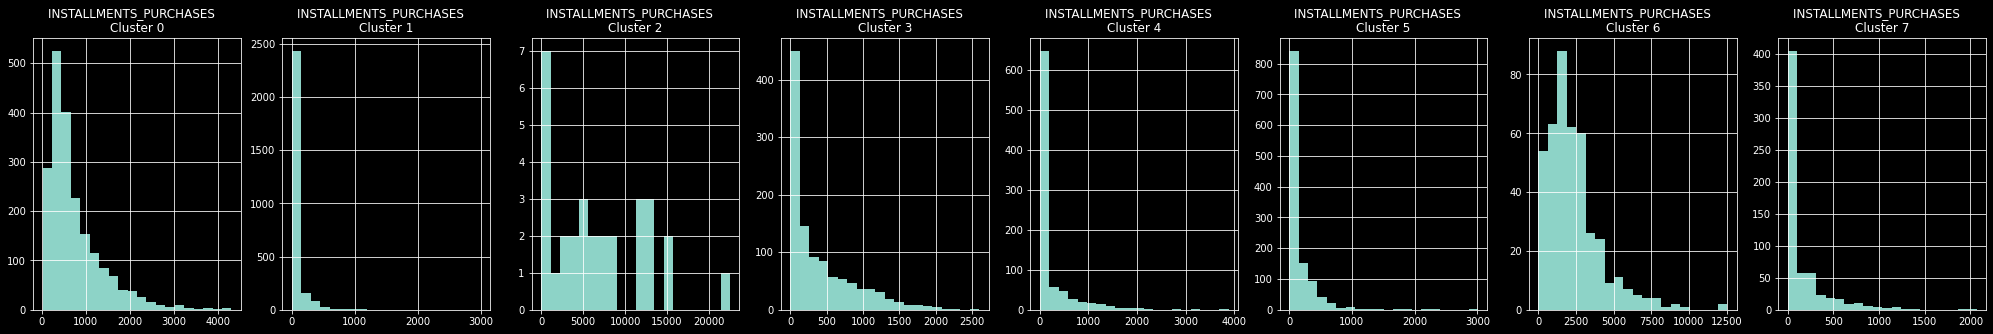

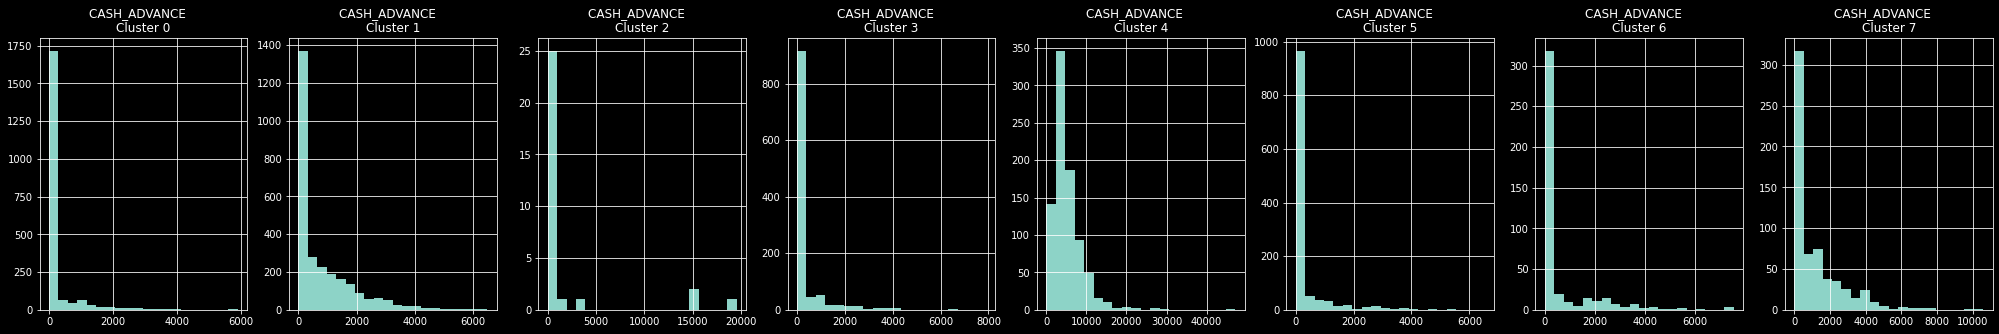

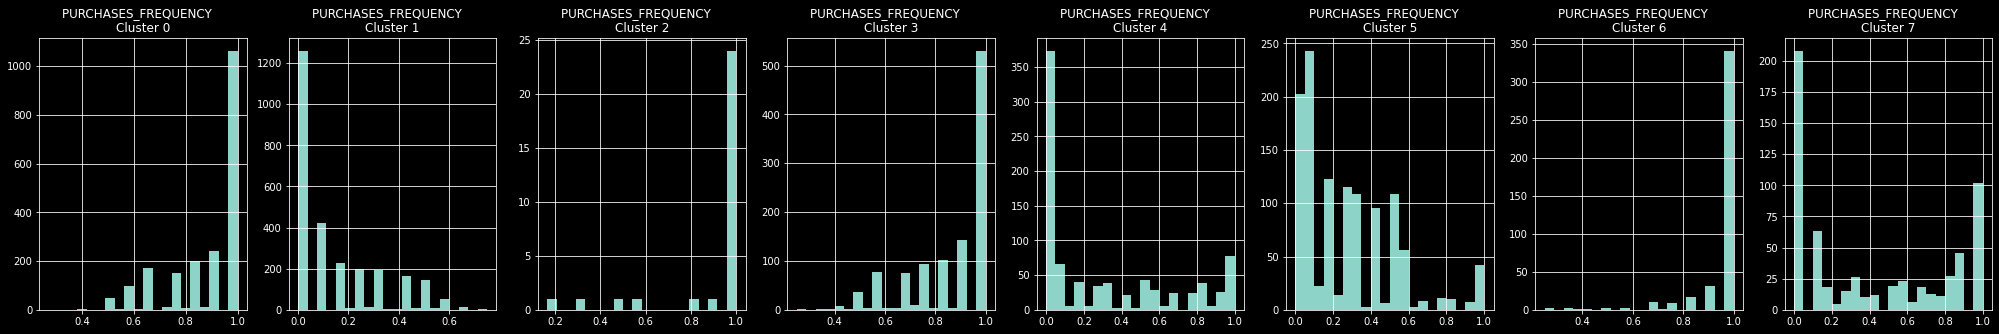

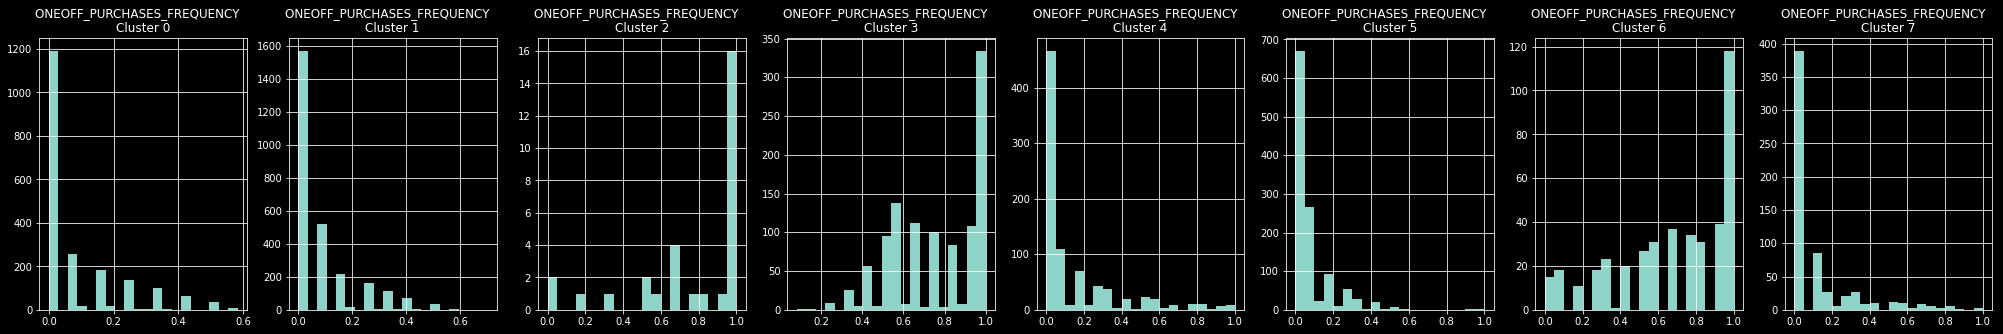

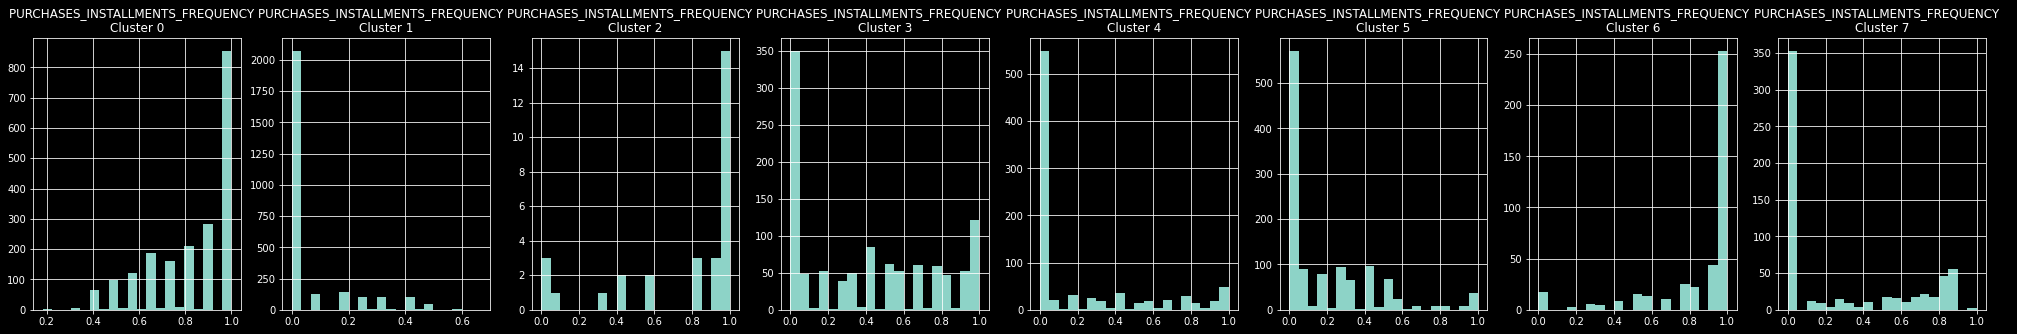

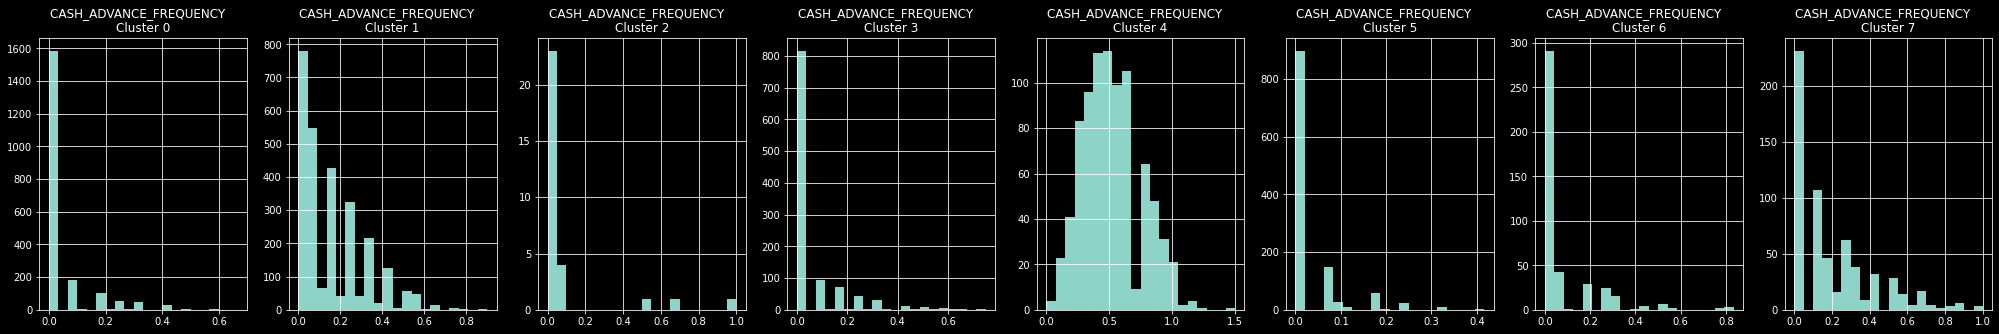

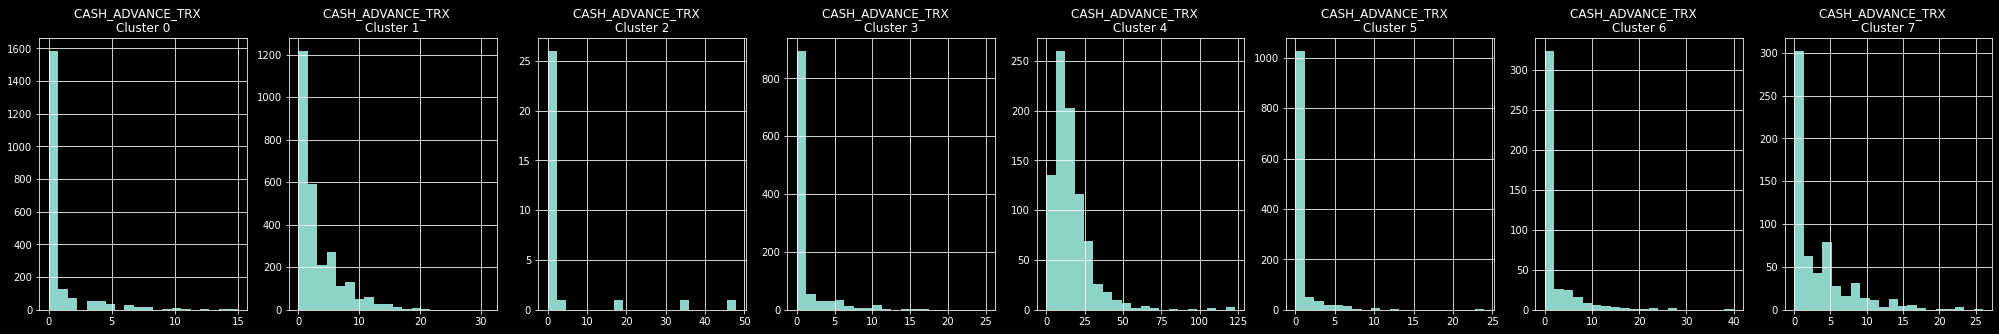

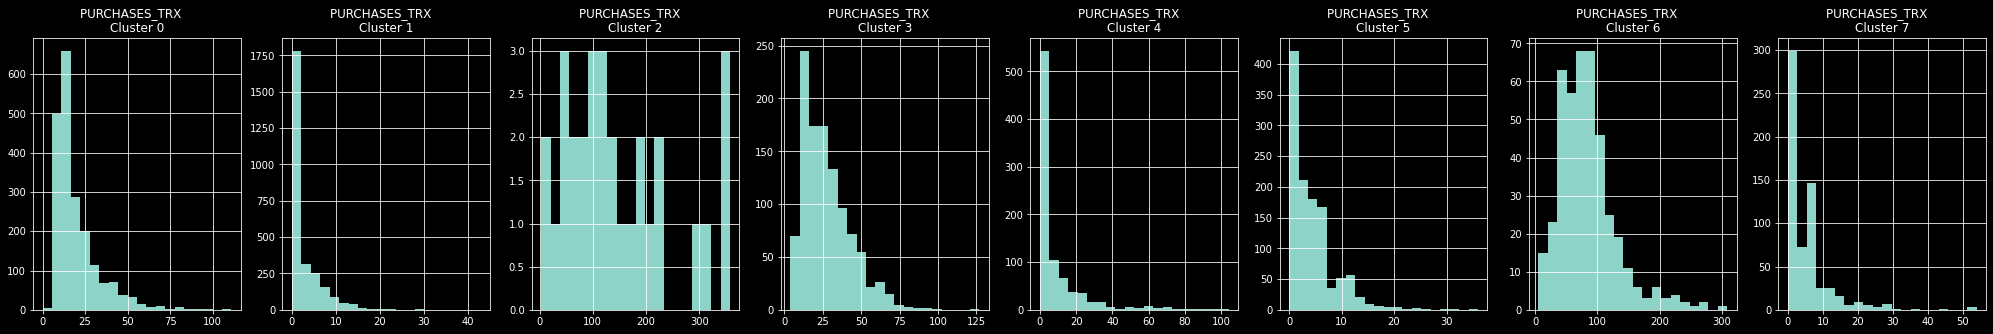

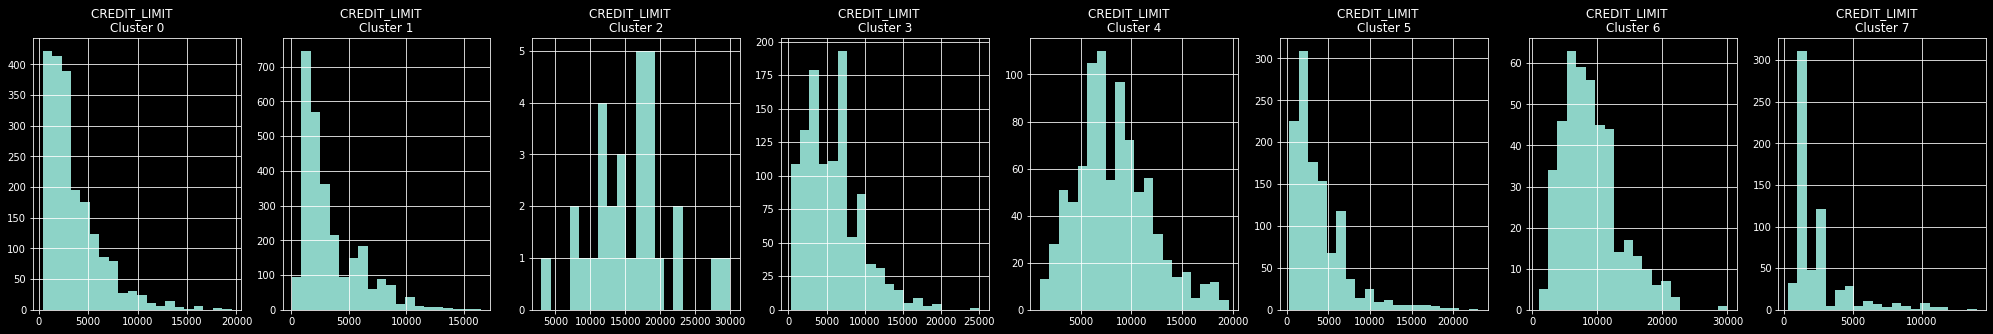

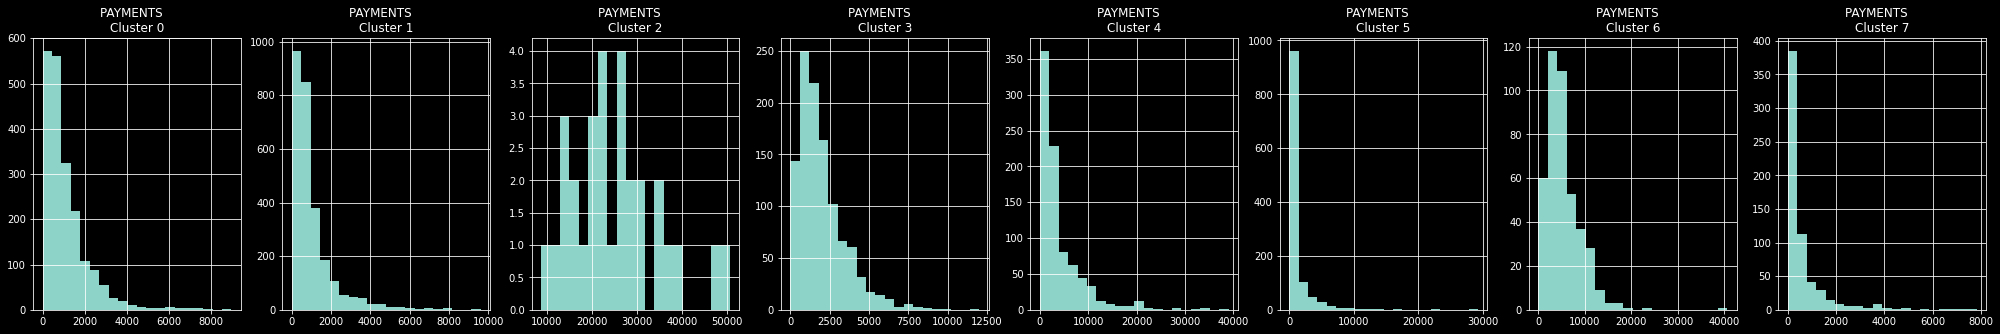

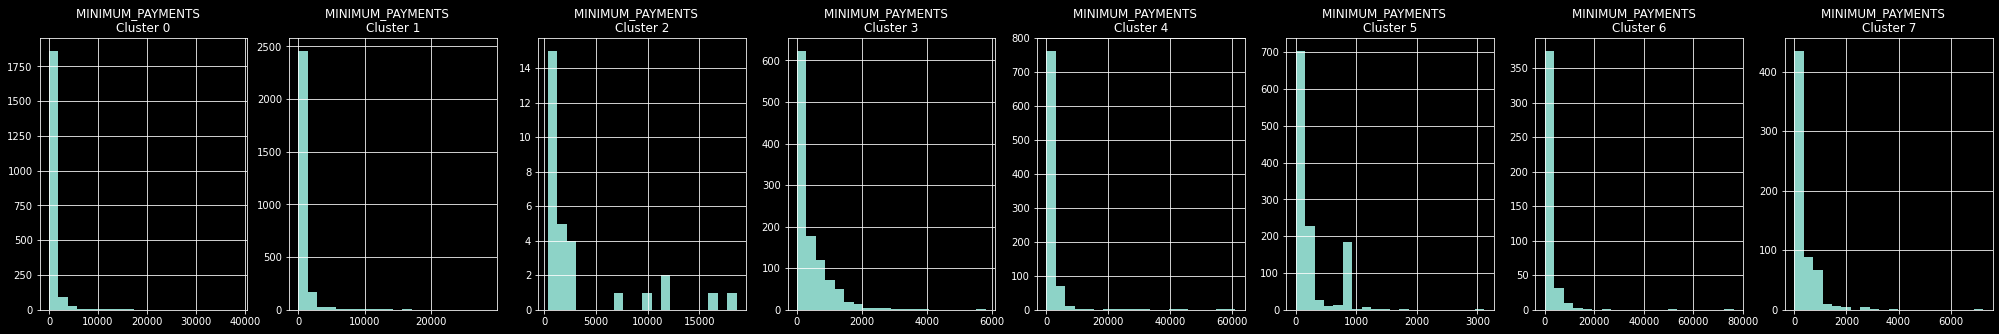

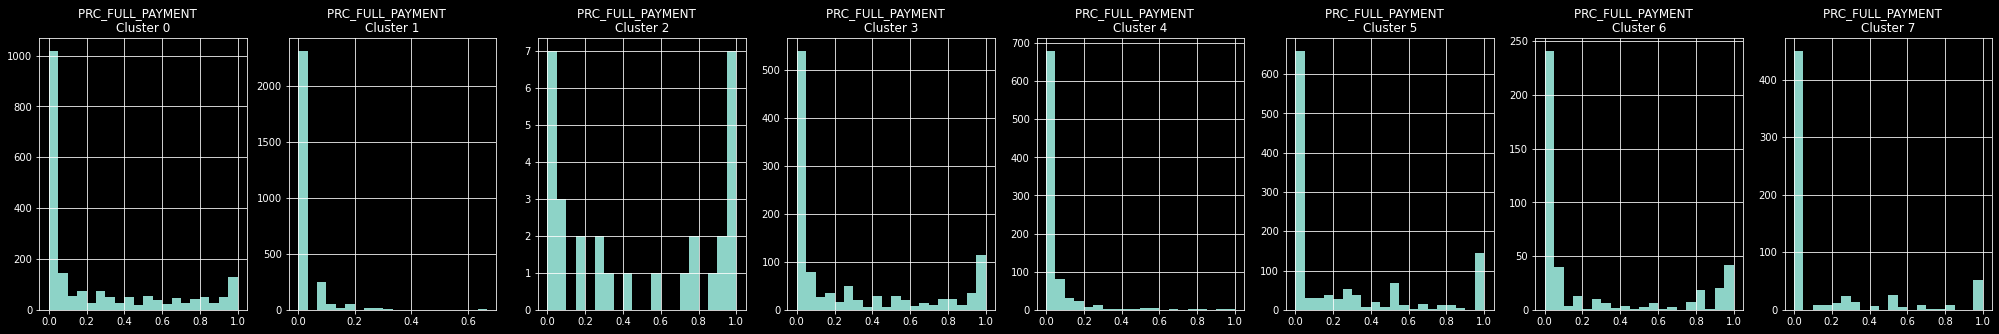

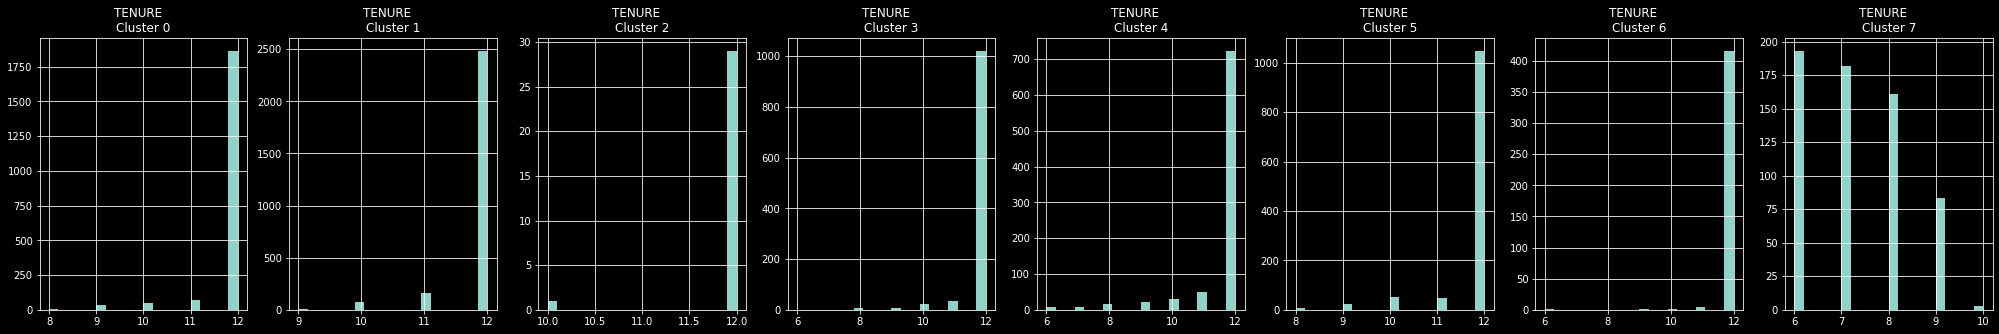

In [36]:
# Visualizar histogramas para cada cluster 
for i in credit_card_df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = credit_card_df_cluster[credit_card_df_cluster['cluster'] == j]
        cluster[i].hist(bins=20)
        plt.title('{}   \nCluster {}'.format(i, j))
    plt.show()

### APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS 

### APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

In [37]:
# Obtener las componentes principales para 2 componentes
pca = PCA(n_components= 2)
principal_comp = pca.fit_transform(credit_card_df_scaled)
principal_comp

array([[-1.68221921, -1.07645272],
       [-1.13828113,  2.5064523 ],
       [ 0.96969324, -0.38353457],
       ...,
       [-0.92620464, -1.81078294],
       [-2.33655496, -0.65795926],
       [-0.55641843, -0.40047146]])

In [38]:
# dataframe con las dos componentes 
pca_df = pd.DataFrame(data= principal_comp, columns=['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682219,-1.076453
1,-1.138281,2.506452
2,0.969693,-0.383535
3,-0.873640,0.043183
4,-1.599429,-0.688587
...,...,...
8945,-0.359629,-2.016144
8946,-0.564379,-1.639108
8947,-0.926205,-1.810783
8948,-2.336555,-0.657959


In [39]:
# Concatenar las etiquetas de los clusters con el dataframe de las componentes principales
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis= 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076453,1
1,-1.138281,2.506452,4
2,0.969693,-0.383535,3
3,-0.873640,0.043183,1
4,-1.599429,-0.688587,1


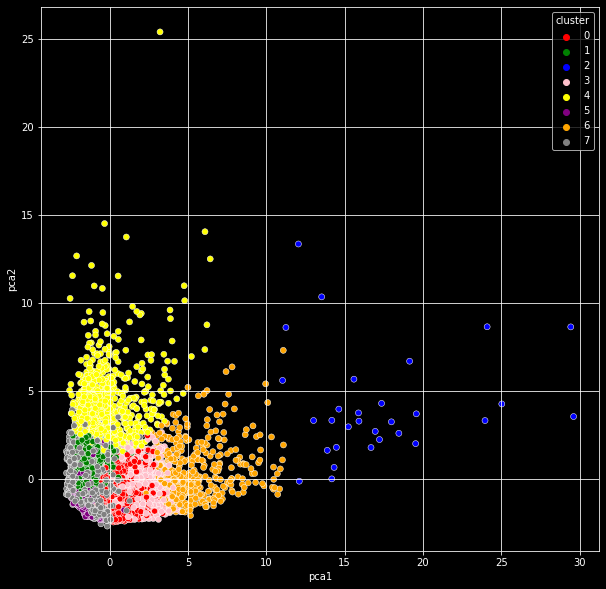

In [40]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data= pca_df, palette= ['red', 'green', 'blue', 'pink', 'yellow', 'purple', 'orange', 'gray'])
plt.grid()
plt.show()

---

### APPLY AUTOENCODERS (REDUCE THE DIMENSION OF THE DATA WITH AUTOENCODERS)

### APLICAR LOS AUTOENCODERS (REDUCIR LA DIMENSIÓN DE LOS DATOS CON LOS AUTOENCODERS) 

**autoencoders work well if there are correlations between the input data and work poorly if all the input data are independent.**

los autoencoders funcionan bien si existen correlaciones entre los datos de entrada y funcionan mal si todos los datos de entrada son independientes.

In [46]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import SGD


In [47]:
encoding_dim = 7 # comprimir toda la info en solo 7 variables
input_df = Input(shape = 17, ) # 17 caracteristicas

# el Glorot normal es un inicializador el cual toma muestras aleatorias de una distribucion normal truncada
x = Dense(encoding_dim, activation= 'relu')(input_df) # relu --> rectificador lineal unitario y se aplica a la info de entrada input_df
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) # 2da capa densa de 500 neuronas 
x = Dense(500, activation= 'relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

# capa de en medio
encoded = Dense(10, activation= 'relu', kernel_initializer= 'glorot_uniform')(x) # 10 variables en el centro (compresion)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) # descompresion
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)        # descompresion   

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)


autoencoder = Model(input_df, decoded)

# 2da version
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error') # funcion de perdidas que hay que minimizar

In [48]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

batch_size = tomar de 128 en 128 clientes
epochs = pasara por los datos un total de 25 veces 

In [55]:
autoencoder.fit(credit_card_df_scaled, credit_card_df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 23s 171ms/step - loss: 0.5612
Epoch 2/25
70/70 [==============================] - 17s 244ms/step - loss: 0.3075
Epoch 3/25
70/70 [==============================] - 10s 145ms/step - loss: 0.2476
Epoch 4/25
70/70 [==============================] - 9s 134ms/step - loss: 0.2004
Epoch 5/25
70/70 [==============================] - 9s 131ms/step - loss: 0.1785
Epoch 6/25
70/70 [==============================] - 10s 136ms/step - loss: 0.1646
Epoch 7/25
70/70 [==============================] - 14s 195ms/step - loss: 0.1479
Epoch 8/25
70/70 [==============================] - 21s 293ms/step - loss: 0.1356
Epoch 9/25
70/70 [==============================] - 18s 254ms/step - loss: 0.1246
Epoch 10/25
70/70 [==============================] - 14s 206ms/step - loss: 0.1099
Epoch 11/25
70/70 [==============================] - 21s 296ms/step - loss: 0.1044
Epoch 12/25
70/70 [==============================] - 16s 218ms/step - loss: 0.0994
Epoch 13/25
70/

In [56]:
# guardando los pesos (w)
# esto crea un archivo con extencion h5 que es el estandar en redes neuronales para guardar arquitectura y pesos
autoencoder.save_weights('autoencoder.h5')


In [58]:
pred = encoder.predict(credit_card_df_scaled)
pred

array([[0.        , 0.29019955, 0.6218404 , ..., 0.        , 0.3458401 ,
        0.03858797],
       [0.        , 0.26850984, 1.159003  , ..., 0.        , 0.74027634,
        3.2071512 ],
       [0.        , 1.2789546 , 1.2484591 , ..., 0.04579054, 0.        ,
        0.5764349 ],
       ...,
       [0.        , 0.71436274, 1.5856283 , ..., 0.63621366, 3.4866376 ,
        0.2435102 ],
       [0.        , 1.2139199 , 2.000309  , ..., 0.20729463, 3.3421147 ,
        0.859819  ],
       [0.        , 3.6952772 , 1.7574422 , ..., 0.        , 3.3069382 ,
        0.        ]], dtype=float32)

In [59]:
pred.shape

(8950, 10)

**applying k-means for classification** 

aplicando k-means para la clasificacion 

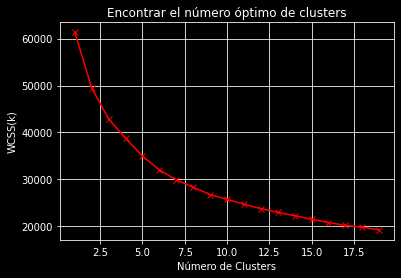

In [61]:
# realizando el metodo del codo otra vez


scores_2 = [] # resumir toda la info relativa a el valor de la suma de los cuadrados

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_) # suma de los cuadrados intra clusters


plt.plot(range_values, scores_2, 'rx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.grid()
plt.show()


C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11836/303287802.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_values, scores_1, 'bx-', color = "orange")
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_11836/303287802.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_values, scores_2, 'bx-', color = "g")


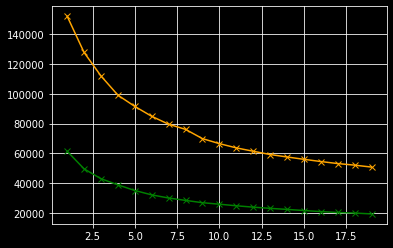

In [64]:
plt.plot(range_values, scores_1, 'bx-', color = "orange")
plt.plot(range_values, scores_2, 'bx-', color = "g")
plt.grid()

In [66]:
# eligiendo 4 clusters ahora
kmeans = KMeans(4)
kmeans.fit(pred)
kmeans

KMeans(n_clusters=4)

In [67]:
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)
y_kmeans


array([0, 1, 0, ..., 2, 2, 2])

In [69]:
# concatenar el dataframe original y el cluster correspondiente
df_cluster_dr = pd.concat([credit_card_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


**creating a two-component PCA**

creando un PCA de dos componentes

In [70]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred) # version comprimida de los datos
pca_df = pd.DataFrame(data=princ_comp, columns=["pca1", "pca2"])
pca_df.head()


,pca1,pca2
0,-1.268146,-0.426781
1,1.699894,-1.734462
2,-0.808220,0.505636
3,-0.253778,-0.487483
4,-1.082934,-0.310876


In [71]:
# concatenar el num de cluster ahora en el pca_df
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df


,pca1,pca2,cluster
0,-1.268146,-0.426781,0
1,1.699894,-1.734462,2
2,-0.808220,0.505636,0
3,-0.253778,-0.487483,0
4,-1.082934,-0.310876,0
...,...,...,...
8945,0.369193,0.354709,3
8946,0.091588,-0.184341,3
8947,0.185586,-0.247710,3
8948,1.395213,-1.350582,3


los clientes se han segmentado en 4 grupos diferentes para que el departamento de marketing pueda conocer las necesidades que producto ofrecer a los clientes

cualquier nuevo cliente se le aplica primero la reducción a 10 variables a través del encoder, luego se le aplica el clustering para cononcer donde caerá y finalmente se aplica el pca para poder conocer en que region por color se coloca, por tanto nuevo cliente del banco se podrá saber exactamente que paquetes o promociones ofrecerle.

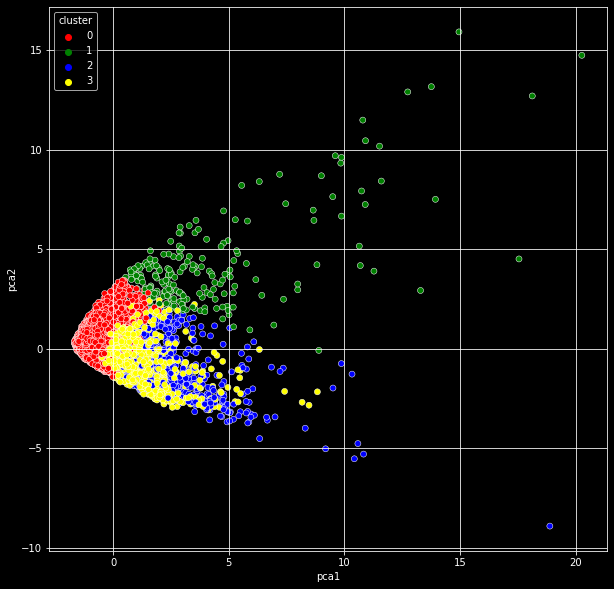

In [72]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.grid()
plt.show()


visulizando en un dataframe solo los clientes de cluster 0 (color rojo)

In [74]:
df_cluster_dr[df_cluster_dr['cluster'] == 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.0,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.0,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.0,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8849,6.992117,0.888889,96.64,0.00,96.64,0.000000,0.888889,0.000000,0.777778,0.000000,0,8,1500.0,88.431789,107.505870,0.0,9,0
8860,75.520764,1.000000,210.48,0.00,210.48,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,81.986811,108.030031,0.0,8,0
8866,63.325286,1.000000,246.64,0.00,246.64,0.000000,1.000000,0.000000,0.875000,0.000000,0,8,1000.0,127.051797,144.406557,0.0,8,0
8877,55.147722,0.875000,163.31,0.00,163.31,0.000000,0.875000,0.000000,0.750000,0.000000,0,7,1000.0,62.619008,109.580539,0.0,8,0


In [99]:
cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []

for c in df_cluster_dr['cluster']:
    if c == 0:
        cluster_0.append(c)

    elif c == 1:
        cluster_1.append(c)
        
    elif c == 2:
        cluster_2.append(c)
        
    else:
        cluster_3.append(c)
        
print('cluster 0 - {} %'.format(len(cluster_0) / df_cluster_dr.shape[0] * 100))
print('cluster 1 - {} %'.format(len(cluster_1) / df_cluster_dr.shape[0] * 100))
print('cluster 2 - {} %'.format(len(cluster_2) / df_cluster_dr.shape[0] * 100))
print('cluster 3 - {} %'.format(len(cluster_3) / df_cluster_dr.shape[0] * 100))


cluster 0 - 74.44692737430168 %
cluster 1 - 2.379888268156425 %
cluster 2 - 12.379888268156424 %
cluster 3 - 10.793296089385475 %
